# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [6]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor 
vars

In [7]:
type(df_select["trans_date_trans_time"][0])

str

In [8]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

In [9]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

In [10]:
dummies = pd.get_dummies(df_select['category'])
X = pd.concat([dummies, df_select[['amt', 'city_pop', 'time_var']]],axis = 1) 
y = df_select['is_fraud']

In [11]:
X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,25
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,33
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,53
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,15
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,17


In [12]:
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

# 4.) Oversample the data

In [13]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Define the oversampler
ros = RandomOverSampler(random_state=0)

# Fit and apply the oversampler
X_resampled, y_resampled = ros.fit_resample(X, y)

# 5.) Train a Logistic regression.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

# Create an instance of the logistic regression model
clf = LogisticRegression()

# Fit the model to the training data
model = clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics like accuracy, precision, recall, etc
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.7848981619473423
Precision: 0.8027421777621528
Recall: 0.7557621712703857


# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [15]:
from sklearn.metrics import roc_curve

# Generate the probabilities for the positive class
y_proba = clf.predict_proba(X_resampled)[:,1]

# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_resampled, y_proba)

# Find the threshold that gives a false positive rate of 5%
threshold = thresholds[np.argmin(np.abs(fpr - 0.05))]
threshold

0.6300257415987603

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [16]:
y_pred_proba_or = model.predict_proba(X)[:, 1]
y_pred_or = (y_pred_proba_or > 0.63).astype(int)

In [17]:
df_select['predictions'] = y_pred_or
df_select_t = df_select[df_select["is_fraud"] == df_select["predictions"]].copy()
df_select_f = df_select[df_select["is_fraud"] != df_select["predictions"]].copy()
df_select_t['Profit'] = 0.02 * df_select_t["amt"]
df_select_f['Profit'] = -1 * df_select_f["amt"]
profit = df_select_t['Profit'].sum() + df_select_f['Profit'].sum()
profit

-9619556.8058

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [18]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
clf = LogisticRegression("l1", solver = 'liblinear')

# Fit the model to the data
clf.fit(X, y)

# Get the coefficients of the model
coef = clf.coef_
print(coef)

[[-4.59105775e+00 -4.62514773e+00 -3.97686648e+00 -4.18223806e+00
  -2.86838856e+00 -4.60307736e+00 -4.71796834e+00 -4.67309292e+00
  -2.83319985e+00 -4.32119936e+00 -4.36846707e+00 -2.77760227e+00
  -3.96650196e+00 -9.39481961e+00  2.08941300e-03 -4.10943712e-07
   2.29082924e-05]]


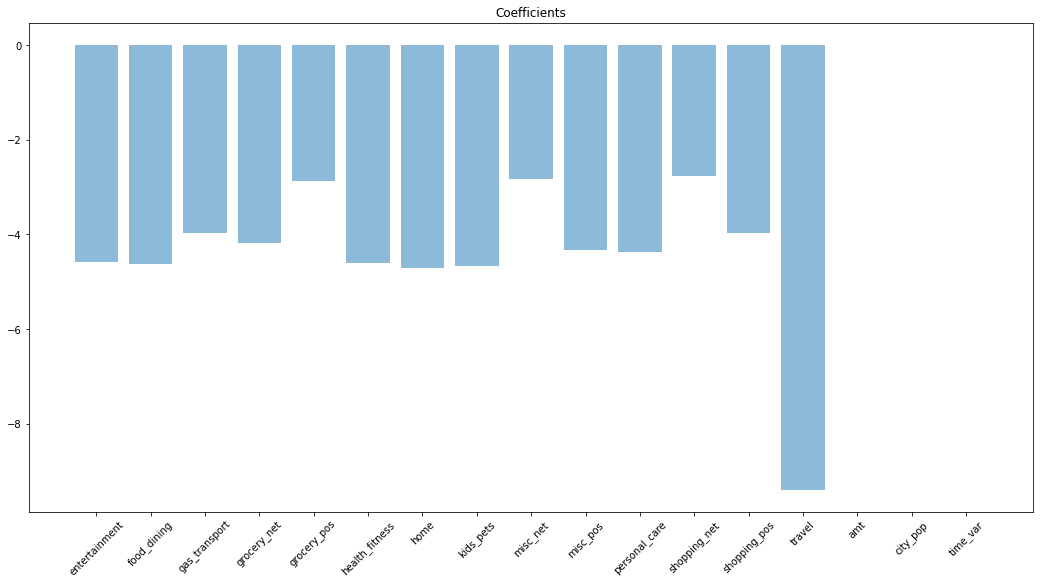

In [19]:
objects = list(X.columns)
plt.figure(figsize = (18, 9))
plt.bar(objects, coef[0], align='center', alpha = 0.5)
plt.xticks(objects, rotation=45)
plt.title('Coefficients')
plt.show()

According to the coefficients plot, all dummy variables which are generated from $category$ are significant. But the coefficients of amt, city_pop and time_var are 0. So these 3 varibales are not good predictors.
